In [108]:
import pandas as pd
import numpy as np
data=pd.read_csv("titanic-data.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<Axes: >

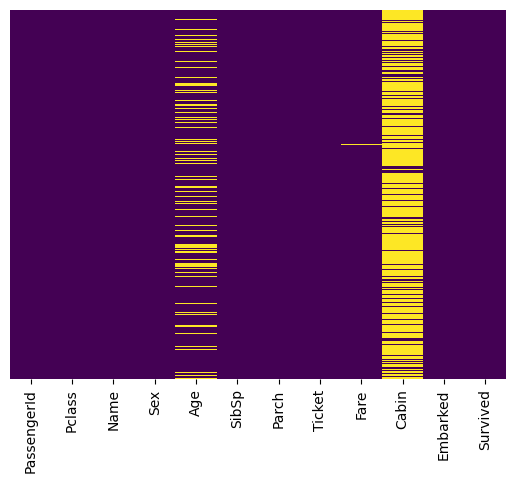

In [109]:
import seaborn as sb
sb.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [110]:
data.drop(['PassengerId', "Cabin","Name","Ticket"], axis=1, inplace=True)

In [111]:
data.Sex = [1 if value.lower() == "male" else 0 for value in data.Sex]

In [112]:
data.Embarked=[1 if value=="S" else 0 for value in data.Embarked]

In [113]:
y = data["Survived"] # our target variable
X = data.drop(["Survived"], axis=1) 

In [114]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,1
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,1
416,3,1,NaN,0,0,8.0500,1


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [118]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [121]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create logistic regression model
lr = LogisticRegression()

# Fit the model on the imputed training data
lr.fit(X_train_imputed, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test_imputed)

In [122]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94
